# Изучение рынка заведений общественного питания Москвы

- <font color='#777778'>Автор:</font> *Наталья Мартынова*

- <font color='#777778'>Дата:</font> *16 октября 2025 г.*

### Цели и задачи проекта

<font color='#777778'>Цель:</font> провести исследовательский анализ рынка заведений общественного питания Москвы.

    
   <font color='#777778'>Задачи:</font>
> - Изучить имеющиеся в распоряжении данные о заведениях общественного питания Москвы (на лето 2022 года).
> - Подготовить данные к проведению исследования.
> - Провести исследовательский анализ данных, сопровождаемый визуализациями.
> - Сформировать выводы и рекомендации, основанные на предоставленных данных.

### Описание данных

В проекте будут использованы данные двух датасетов.

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:

> - name — название заведения;
> - address — адрес заведения;
> - district — административный район, в котором находится заведение, например Центральный административный округ;
> - category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
> - hours — информация о днях и часах работы;
> - rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
> - chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки): 0 — заведение не является сетевым; 1 — заведение является сетевым.
> - seats — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:

> - price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
> - avg_bill — строка (видимо, в описании на платформе ошибка и имеется в виду столбец), которая хранит среднюю стоимость заказа в виде диапазона, например: «Средний счёт: 1000–1500 ₽»; «Цена чашки капучино: 130–220 ₽»; «Цена бокала пива: 400–600 ₽» и так далее;
> - middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки
    «Средний счёт»: Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений. Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число. Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
> - middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»: Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений. Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число. Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

<font color='#777778'>1. Загрузка данных и знакомство с ними:
> - Загрузка данных.
> - Знакомство с данными и их обзор.
> - Промежуточный вывод.
> - Подготовка единого датафрейма.
    
<font color='#777778'>2. Предобработка данных: 
    
> - Корректировка названий столбцов датафреймов.
> - Преобразование типов данных в столбцах.
> - Изучение и обработка пропущенных значений в данных.
> - Проверка данных на явные и неявные дубликаты.
> - Создание новых столбцов для дальнешей работы с данными.
> - Промежуточный вывод о проведённой предобработке.
    
<font color='#777778'>3. Исследовательский анализ данных.</font>

> - Изучение категорий заведений общественного питания.
> - Исследование распределения заведений по административным районам Москвы.
> - Изучение соотношение сетевых и несетевых заведений.
> - Исследование количества посадочных мест в заведениях.
> - Исследование рейтинга заведений.
> - Изучение корреляций рейтинга заведений с другими данными о них.
> - Составление и изучение топ-15 популярных сетей в Москве.
> - Изучение среднего чека заведений и его зависимости от района Москвы.
> - Обобщение результатов исследовательского анализа данных.
    
<font color='#777778'>4. Итоговый вывод и рекомендации.</font>

---

## Загрузка данных и знакомство с ними

### Загрузка данных

Импортируем библиотеки, которые потребуются нам в проекте, и загрузим данные из файлов:

In [1]:
# Комментарий ревьюера
# Для задания по расчету корреляции требуется установить библиотеку
# Устанавливаем библиотеку phik
!pip install phik -U    
# Библиотека для расчета коэффициента корреляции phi_k
# from phik import phik_matrix

In [2]:
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные rest_info_df и rest_price_df
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

### Знакомство с данными и их обзор

Познакомимся с данными датасета `rest_info_df` — выведем первые строки методом head() и информацию методом info():

In [4]:
# Выведем первые пять строк таблицы
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выведем общую информацию о содержимом таблицы
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info_df` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы на лето 2022 года. 

В таблице присутствует столбец `id`, содержимое которого не приведено в описании данных. Мы не знаем точно идентификаторы чего содержатся в этом столбце, но можем предположить, что это идентификаторы заведений. Нужно это проверить.

Названия всех столбцов соответствуют содержимому в них и представлены в формате написания, удобном для дальнейшей работы с данными: нет разных регистров при написании букв или пробелов и других лишних знаков. Преобразовывать формат названий столбцов не требуется. 

Пропуски содержатся в двух столбцах: `hours` (информация о днях и часах работы) и `seats` (количество посадочных мест). В последнем пропусков почти половина от общего числа строк. Нужно будет ещё проверить остальные данные на возможные значения-индикаторы, которые заменяют пропущенные данные. 

Типы данных в большинстве столбцов соответствуют информации в них. Только в столбце `seats` с количеством посадочных мест тип дробный, но мест не может быть не целое число, но в столбце сейчас присутствуют пропуски - поэтому и тип данных в столбце сейчас `float64`, Если мы в соответствующем разделе заполним эти пропуски, тогла можно будет преобразовать тип на целочисленный. И ещё в столбце `chain` (показывает, является ли заведение сетевым) содержатся только 0 и 1, для них не требуется большой объём ячеек - можно понизить разрядность до `int8` для оптимизации ресурсов.

Теперь познакомимся с данными датасета `rest_price_df`:

In [6]:
# Выведем первые пять строк таблицы
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выведем общую информацию о содержимом таблицы
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price_df` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

Во второй таблице тоже присутствует столбец `id`, содержимое которого не приведено в описании данных. Мы не знаем точно идентификаторы чего содержатся в этом столбце. Мы уже предположили в случае первого датасета, что это идентификаторы заведений. Нужно это проверить.

Написание названий столбцов соответствует принятому в Python стилю `snake_case`, но сами названия не совсем описывают суть содержимого в столбцах. Для удобства работы с данными в дальнейшем я бы их переименовала. Например, столбе `price` содержит не цену, а категорию цен. Значит столбец лучше назвать `category_of_price` или `price_cat` для компактности. И так же нужно переименовать остальные столбцы в этой таблице (кроме `id`).

Пропуски содержатся во всех столбцах (в четырёх), кроме первого (`id`). Причём в последнем столбце `middle_coffee_cup` (с оценочной величиной одной чашки капучино) заполнена всего 1/8 строк. Нужно будет ещё проверить остальные данные на возможные значения-индикаторы, которые могут заменять пропущенные данные.

Типы данных в столбцах соответствуют информации в них. Преобразовывать типы данных нет необходимости.

---

### Промежуточный вывод

По итогам знакомства с данными можно отметить:

- Преобразовывать формат написания названий столбцов необходимости нет.
- Нужно переименовать столбцы датафрейма `rest_price_df` (все кроме `id`), чтобы названия соответствовали смыслу содержимого.
- Нужно понизить разрядность типа целого числа в столбце `chain` первого датафрейма `rest_info_df` до `int8`.
- Пропуски присутствуют в обоих датасетах, есть столбцы с очень значительной долей пропущенных значений. Пропуски требуют внимательной обработки. После неё, возможно, нужно будет преобразовать тип данных в столбце `seats` на целочисленный, что больше бы соответствовало содержимому столбца.

### Подготовка единого датафрейма

Объединим данные двух датасетов в один. Из имеющихся в двух датасетах столбцов логичнее всего видится объединение по полю `id`, но так как оно отсутствует в предоставленном нам описании данных, нужно сначала разобраться, идентификаторы чего в нём приведены и, исходя из этого, примем решение о типе объединения.

In [8]:
# Рассчитаем количество уникальных значений в столбце id в первом датафрейме rest_info_df
rest_info_df['id'].nunique()

8406

Количество уникальных значений соответствует числу строк в датафрейме, то есть в первом датафрейме все id уникальны.

In [9]:
# Рассчитаем количество уникальных значений в столбце с названиями заведений name
rest_info_df['name'].nunique()

5614

Значит названия не уникальны и повторяются. Это объяснимо - ведь в наших данных есть сетевые заведения, у которых одинаковые названия, но разные адреса.

In [10]:
# Рассчитаем количество уникальных значений в столбце с адресами заведений address
rest_info_df['address'].nunique()

5753

Значит адреса тоже повторяются, это тоже объяснимо - в одном здании может быть несколько заведений общественного питания. Логично предположить, что если в первом датафрейме все сочетания название+адрес уникальны, то все уникальные id соответствуют уникальным заведениям. Проверим эту гипотезу:

In [11]:
# Усечём первый датафрейм до двух интересующих нас столбцов name и address
rest_info_df_1 = rest_info_df.copy()
rest_info_df_1 = rest_info_df_1[['name', 'address']]
rest_info_df_1.head()

,name,address
0,WoWфли,"Москва, улица Дыбенко, 7/1"
1,Четыре комнаты,"Москва, улица Дыбенко, 36, корп. 1"
2,Хазри,"Москва, Клязьминская улица, 15"
3,Dormouse Coffee Shop,"Москва, улица Маршала Федоренко, 12"
4,Иль Марко,"Москва, Правобережная улица, 1Б"


In [12]:
# Проверим, есть ли полные дубликаты в усечённой таблице
rest_info_df_1.duplicated().sum()

0

Раз в усечённой до двух столбцов таблице нет дубликатов, значит все сочетания название+адрес в первом датафрейме уникальны, как и все id. Этим мы выяснили, не имея точной предварительной информации на этот счёт, что id в первом датафрейме указывают на уникальные заведения и по ним можно производить объединение датафреймов, чтобы получить полную информацию о заведениях. Способом соединения выберем left, так как в данном проекте мы исследуем именно заведения и нам нужна информация о них (это первый датасет):

In [13]:
df = pd.merge(rest_info_df, rest_price_df, how='left', on='id')
df.head(10)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
6,96ebceb1a09e4e3191133b9fe0379a64,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0,средние,Средний счёт:199 ₽,199.0,NaN
7,0243288b78024af090b8e947842c969c,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0,средние,Средний счёт:200–300 ₽,250.0,NaN
8,36aeb0ffa69c48fdb0021549520deb10,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79.0,средние,Средний счёт:от 500 ₽,500.0,NaN
9,487167877eb04288bc90d4fa80646fc2,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65.0,средние,Средний счёт:1000–1200 ₽,1100.0,NaN


Мы видим, что при объединении имеются строки, в которых идентификаторы совпали. Значит предположение, что это были идентификаторы записей в базу данных и по ним, действительно, соотвносились друг с другом эти две таблицы, было верным.

Теперь имеет смысл изучить общие сведения о новом объединённом датасете, чтобы составить план предстоящей предобработки:

In [14]:
# Выведем общую информацию о содержимом новой объединённой таблицы
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Объединённый датафрейм содержит 8406 строк (столько, сколько и было в первой таблице - это логично, учитывая тип выбранного нами присоединения). Пропуски имеются в шести столбцах (суммировались 2 столбца из первой таблицы и 4 из второй). Преобразовывать формат написания названий столбцов необходимости нет. Нужно будет переименовать столбцы `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`, чтобы названия больше соответствовали смыслу содержимого для удобства дальнейшей работы с данными. И нужно понизить разрядность типа целого числа в столбце `chain` до int8 для оптимизации ресурсов. Пропуски требуют внимательного рассмотрения и при необходимости - обработки. После неё, возможно, нужно будет преобразовать тип данных в столбце `seats` на целочисленный, что больше бы соответствовало содержимому столбца.

## Предобработка данных

### Корректировка названий столбцов датафрейма

Нам ужно переименовать столбцы `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`, чтобы названия соответствовали смыслу содержимого. Сделаем это с помощью метода .rename(), которому передадим словарь с новыми названиями столбцов:

In [15]:
# Передаём методу rename() словарь со старыми и новыми названиями столбцов
df = df.rename(columns={'price': 'price_cat',
                                 'avg_bill': 'bill_range',
                                 'middle_avg_bill': 'middle_of_bill_range',
                                 'middle_coffee_cup': 'middle_of_coffee_cup_price'})
# Выведем новые названия столбцов датафрейма
df.columns

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price_cat', 'bill_range', 'middle_of_bill_range',
       'middle_of_coffee_cup_price'],
      dtype='object')

Мы переименовали 4 столбца, чтобы в дальнейшем нам было удобнее оперировать данными в них, понимая смысл содержимого столбцов.

### Преобразование типов данных в столбцах

После предварительного знакомства с данными мы решили понизить разрядность типа целого цисла в столбце `chain` до `int8`, так как в этих ячейках содержатся только 0 и 1 (в этом мы предварительно убедимся) и для их хранения будет достаточно минимального разряда целочисленного типа.

In [16]:
# Убедимся, что в столбце chain содержатся только 0 и 1
# rest_info_df['chain'].unique()
df['chain'].unique()

array([0, 1])

Всё так и есть - только 0 и 1. И мы знаем, что пропусков в этом столбце нет. Можем смело снижать разрядность типа данных:

In [17]:
# rest_info_df['chain'] = pd.to_numeric(rest_info_df['chain'], downcast='integer')
# print(rest_info_df['chain'].dtypes)

# Меняем тип данных в столбце chain и выводим новый тип столбца для проверки корректности своих действий
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
print(df['chain'].dtypes)

int8


Преобразование типа в столбце `chain` прошло успешно.

### Изучение и обработка пропущенных значений в данных

Посчитаем абсолютное количество и долю пропусков в столбцах:

In [18]:
#Выведем количество пропусков в каждом столбце в порядке убывания значения
print(df.isna().sum().sort_values(ascending=False))

middle_of_coffee_cup_price    7871
middle_of_bill_range          5257
price_cat                     5091
bill_range                    4590
seats                         3611
hours                          536
id                               0
name                             0
category                         0
address                          0
district                         0
rating                           0
chain                            0
dtype: int64


In [19]:
#Выведем долю пропусков в столбцах
print(df.isna().mean().sort_values(ascending=False))

middle_of_coffee_cup_price    0.936355
middle_of_bill_range          0.625387
price_cat                     0.605639
bill_range                    0.546039
seats                         0.429574
hours                         0.063764
id                            0.000000
name                          0.000000
category                      0.000000
address                       0.000000
district                      0.000000
rating                        0.000000
chain                         0.000000
dtype: float64


Больше всего пропусков присутствует в столбце с оценкой диапазона цены чашки кофе `middle_of_coffee_cup_price` - 7871 строки (0,94). Мы изначально из описания данных знаем, что присутствие пропусков в этом столбце напрямую связано с содержимым столбца с диапазоном среднего счёта `bill_range`: "Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт". Чтобы убедиться, что все пропуски столбца `middle_of_coffee_cup_price` проистекают из этого условия, посчитаем, в скольких строках столбца `bill_range` содержимое не начинается с подстроки «Цена одной чашки капучино»:

In [20]:
# Рассчитаем, в скольких строках столбца bill_range содержимое не начинается с подстроки «Цена одной чашки капучино»
count_not_starting_with = (~df['bill_range'].str.startswith('Цена одной чашки капучино', na=False)).sum()

print(f"Количество строк, где содержимое не начинается с 'Цена одной чашки капучино': {count_not_starting_with}")

Количество строк, где содержимое не начинается с 'Цена одной чашки капучино': 8406


Число не совпало. Проверим, что может быть причиной - обратимся снова к содержимому этих двух столбцов:

In [21]:
# Выведем несколько первых строк столбцов bill_range и middle_of_coffee_cup_price
df[['bill_range', 'middle_of_coffee_cup_price']].head(10)

,bill_range,middle_of_coffee_cup_price
0,NaN,NaN
1,Средний счёт:1500–1600 ₽,NaN
2,Средний счёт:от 1000 ₽,NaN
3,Цена чашки капучино:155–185 ₽,170.0
4,Средний счёт:400–600 ₽,NaN
5,NaN,NaN
6,Средний счёт:199 ₽,NaN
7,Средний счёт:200–300 ₽,NaN
8,Средний счёт:от 500 ₽,NaN
9,Средний счёт:1000–1200 ₽,NaN


Мы видим, что в описании данных, предоставленном учебной платформой, была неточность - строка не 'Цена одной чашки капучино', а 'Цена чашки капучино'. Теперь посчитаем строки, которые не начинаются с 'Цена чашки капучино':

In [22]:
# Рассчитаем количество строк в столбце bill_range, которые не начинаются с 'Цена чашки капучино':
count_not_starting_with = (~df['bill_range'].str.startswith('Цена чашки капучино', na=False)).sum()

print(f"Количество строк, где содержимое не начинается с 'Цена чашки капучино': {count_not_starting_with}")

Количество строк, где содержимое не начинается с 'Цена чашки капучино': 7871


Теперь полное совпадение. Значит причину такого большого количества пропусков в столбце `middle_of_coffee_cup_price` мы теперь знаем точно - она проистекает из условия и связи значений этого столбца со значениями в столбце `bill_range`. То есть пропуски в столбце `middle_of_coffee_cup_price` обоснованы - мы их оставляем.

Следующим по числе и доле пропусков у нас идёт столбец `middle_of_bill_range` - 5257 пропусков (0,63). значения в этом столбце аналогично связаны с содержимым столбца `bill_range`: "если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений; если в строке указано одно число — цена без диапазона, то в столбец войдёт это число; если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт". Посчитаем, сколько строк столбца `bill_range` не начинаюся со слов «Средний счёт»:

In [23]:
# Рассчитаем количество строк в столбце bill_range, которые не начинаются с 'Средний счёт':
count_not_starting_with2 = (~df['bill_range'].str.startswith('Средний счёт', na=False)).sum()

print(f"Количество строк, где содержимое не начинается с 'Средний счёт': {count_not_starting_with2}")

Количество строк, где содержимое не начинается с 'Средний счёт': 5257


Число совпадает - все пропуски в столбце `middle_of_bill_range` обоснованы условиями и связью значений этого столбца со значениями в столбце `bill_range` - мы их тоже оставляем.

Далее рассмотрим пропуски в столбце `price_cat` - с категорией цен заведения. Их 5091 (0,61). В описании данных нам не предоставлена информация, на основе чего присваивались эти категории. Можно предположить, что это поле заполняли пользователи на основе своей субъективной оценки - потому что в датафрейме есть записи, где эта категория указана, а данных о счёте нет, то есть категория не присвоена на основе среднего чека. И, вероятно, заполнение этого поля не было обязательным, поэтому во многих записях этого поля имеются пропуски. По плану исследовательского анализа нет прямой работы с этим слолбцом, поэтому пропуски в нём оставим, как есть. 

В столбце `bill_range` присутствует 4590 пропусков, что составляет долю 0,55. Что нам известно об этом столбце: "строка (видимо, в описании на платформе ошибка и имеется в виду столбец), которая хранит среднюю стоимость заказа в виде диапазона, например: «Средний счёт: 1000–1500 ₽»; «Цена чашки капучино: 130–220 ₽»; «Цена бокала пива: 400–600 ₽» и так далее". Предполагаем, что причина этих пропусков также в том, что при заполнении это поле не являлось обязательным. В дальнейшем мы будет изучать средний чек в зависимости от районов Москвы, то есть данные этого столбца важны для исследования. Пропусков в нём слишком большая доля, чтобы просто избавиться от строк с ними. Тип данных в столбце - object, то есть на основе его содержимого не будут рассчитываться статистики, значит пропуски не исказят исследование на основе данных этого столбца. Оставим их.

В столбце с числом посадочных мест в заведениях `seats` пропуски присутствуют в 3611 строках, что составляет 0,43 от общего числа строк. В дальнейшем исследовании у нас присутствует задача по изучению количества посадочных мест - эти данные нам важны. Пропусков почти половина от общего числа строк - удалить мы строки с пропусками точно не можем. Причины для пропусков этих могут быть многочисленные. Попробуем выяснить, есть ли связь между наличием пропусков в этом столбце и категорией заведения (возможно, отсутствие точного числа мест связано с форматом заведения):

In [24]:
#Выведем долю пропусков в каждом столбце, сгрупировав данные по категориям заведений
def df_missing_share(df):
    # Группируем данные по столбцу category
    grouped = df.groupby('category')
    
    # Вычисляем долю пропусков для каждой группы
    missing_share = grouped.apply(lambda x: x.isna().mean())
    
    return missing_share


df_missing_share(df)

,id,name,category,address,district,hours,rating,chain,seats,price_cat,bill_range,middle_of_bill_range,middle_of_coffee_cup_price
category,,,,,,,,,,,,,
"бар,паб",0.0,0.0,0.0,0.0,0.0,0.023529,0.0,0.0,0.388235,0.354248,0.366013,0.543791,0.992157
булочная,0.0,0.0,0.0,0.0,0.0,0.027344,0.0,0.0,0.421875,0.839844,0.792969,0.792969,1.000000
быстрое питание,0.0,0.0,0.0,0.0,0.0,0.054726,0.0,0.0,0.421227,0.684909,0.605307,0.606965,0.998342
кафе,0.0,0.0,0.0,0.0,0.0,0.157696,0.0,0.0,0.487805,0.733810,0.706476,0.708158,0.998318
кофейня,0.0,0.0,0.0,0.0,0.0,0.010616,0.0,0.0,0.468507,0.663128,0.489738,0.858457,0.631281
пиццерия,0.0,0.0,0.0,0.0,0.0,0.007899,0.0,0.0,0.325434,0.508689,0.368088,0.375987,0.995261
ресторан,0.0,0.0,0.0,0.0,0.0,0.036221,0.0,0.0,0.378365,0.502203,0.490945,0.490945,1.000000
столовая,0.0,0.0,0.0,0.0,0.0,0.028571,0.0,0.0,0.479365,0.514286,0.425397,0.425397,1.000000


Пропуски в `seats` не сосредоточены в каких-то из категорий заведений. То есть причина их наличия с типом заведения не связана (в булочной или быстром питании может не быть посадочных мест, но этого не может быть в ресторане или столовой). Значит мы не можем сказать, что пропуск связан с отсутствием посадочных мест в определённом типе заведения. Проверим, есть ли связь с районом расположения заведения:

In [25]:
#Выведем долю пропусков в каждом столбце, сгрупировав данные по округам
def df_missing_share(df):
    # Группируем данные по столбцу district
    grouped = df.groupby('district')
    
    # Вычисляем долю пропусков для каждой группы
    missing_share = grouped.apply(lambda x: x.isna().mean())
    
    return missing_share


df_missing_share(df)

,id,name,category,address,district,hours,rating,chain,seats,price_cat,bill_range,middle_of_bill_range,middle_of_coffee_cup_price
district,,,,,,,,,,,,,
Восточный административный округ,0.0,0.0,0.0,0.0,0.0,0.093985,0.0,0.0,0.476190,0.694236,0.611529,0.674185,0.947368
Западный административный округ,0.0,0.0,0.0,0.0,0.0,0.077556,0.0,0.0,0.438308,0.639248,0.574618,0.640423,0.941246
Северный административный округ,0.0,0.0,0.0,0.0,0.0,0.060000,0.0,0.0,0.350000,0.618889,0.541111,0.642222,0.914444
Северо-Восточный административный округ,0.0,0.0,0.0,0.0,0.0,0.068462,0.0,0.0,0.433221,0.653199,0.586981,0.662177,0.932660
Северо-Западный административный округ,0.0,0.0,0.0,0.0,0.0,0.097800,0.0,0.0,0.349633,0.643032,0.547677,0.616137,0.941320
Центральный административный округ,0.0,0.0,0.0,0.0,0.0,0.013827,0.0,0.0,0.474576,0.459857,0.423729,0.527208,0.925959
Юго-Восточный административный округ,0.0,0.0,0.0,0.0,0.0,0.119048,0.0,0.0,0.509804,0.721289,0.669468,0.728291,0.950980
Юго-Западный административный округ,0.0,0.0,0.0,0.0,0.0,0.083216,0.0,0.0,0.368124,0.654443,0.610719,0.668547,0.950635
Южный административный округ,0.0,0.0,0.0,0.0,0.0,0.072870,0.0,0.0,0.364350,0.651345,0.580717,0.647982,0.948430


Тоже нет какой-то явной сосредоточенности пропусков в определённом районе. Распределение пропусков выглядит случайным, не связанным с какими-то конкретными характеристиками, присутствующими в наших данных. Можем предположить, что тип пропусков в данном случае - MCAR. Такой тип пропусков связан либо с техническими ошибками, либо с человеческим фактором: информация могла быть не указана владельцами заведений или сборщиками данных - возможно потому, что поле с количеством посадочных мест было необязательным при заполнении анкеты или формы для сбора данных; или могли быть проблемы с источниками данных: если данные собирались из разных источников, некоторые из них могли не содержать информацию о количестве посадочных мест. Удалить 43% строк мы не можем без вреда данным. Заполнить эти пропуски, основываясь на какой-то логике, не представляется возможным, исходя из имеющейся у нас информации. Тип данных с столбце числовой - `float64`.  Чтобы было удобно работать с этим столбцом в дальнейшем, можно заполнить пропуски нереалистичным значением−заглушкой типа «-1», по которому затем можно будет легко отфильтровать данные. Но перед этим проверим, не в встречаются ли уже значения-индикаторы в этом столбце:

In [26]:
# Выведем основные описательные статистики столбца seats
df['seats'].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Есть заведения, для который явно указано 0 посадочных мест. 1288 посадочных мест похоже на ошибку - надо будет иметь этот факт ввиду, когда начнём подробно исследовать данные этого столбца в соответствующем разделе позже. Значений «-1» не встречается в столбце - можем использовать его для заполнения пропусков в этом столбце и позже по нему отфильтровывать данные. А также мы после замены можем изменить тип этого столбца на целочисленный:

In [27]:
#Заменяем пропуски в столбце seats на значение-индикатор -1 и затем преобразуем тип данных столбца на int16
df['seats']=df['seats'].fillna(-1)
df['seats'] = pd.to_numeric(df['seats'], downcast='integer')
print(df['seats'].describe())
print(f'Тип данных столбца seats после преобразования: {df["seats"].dtypes}')

count    8406.000000
mean       61.416964
std       107.424767
min        -1.000000
25%        -1.000000
50%        20.000000
75%        85.000000
max      1288.000000
Name: seats, dtype: float64
Тип данных столбца seats после преобразования: int16


Обработка пропусков и последующее преобразование типа прошли успешно.

В столбце с днями и часами работы заведений `hours` пропуски присутствуют в 536 строках, что составляет 0,06 от общего числа строк. Пропусков меньше 1% и в дальнейшем исследовании этот столбец не участвует, значит эти пропуски мы можем просто проигнорировать. Если мы посмотрим в двух табличках выше столбец этого признака, то увидим что чаще всего время работы не указывали кафе (15% случаев) и заведения Юго-Восточного административного округа (12%). Причинами пропусков могут быть: необязательность заполнения поля; специфика заведений: кафе могут иметь более гибкий график работы по сравнению с другими типами заведений, что затрудняет фиксирование единого расписания; проблемы с источниками данных: если данные собирались из разных источников, некоторые из них могли не содержать информацию о времени работы заведений, особенно в определённых административных округах.

Далее проверим, встречаются ли в данных числовых столбцов значения-индикаторы, которые можно рассматривать как пропуски. Это поможет понять качество данных и избежать ошибок при их агрегации, когда значение-индикатор будет учитываться при расчёте среднего или медианы, что исказит исходные данные. Проверим столбцы с числовыми типами, кроме seats, диапазон значений в котором мы уже исследовали:

In [28]:
# Проверяем уникальные значения в столбцах
for column in ['rating', 'chain', 'middle_of_bill_range', 'middle_of_coffee_cup_price']:
    print(f'Основные статистики столбца {column}:')
    print(df[column].describe())
    print()

Основные статистики столбца rating:
count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Основные статистики столбца chain:
count    8406.000000
mean        0.381275
std         0.485729
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: chain, dtype: float64

Основные статистики столбца middle_of_bill_range:
count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_of_bill_range, dtype: float64

Основные статистики столбца middle_of_coffee_cup_price:
count     535.000000
mean      174.721495
std        88.951103
min        60.000000
25%       124.500000
50%       169.000000
75%       225.000000
max      1568.000000
Name: middle_of_coffee_cup_price, dtype:

Судя по основным описательным статистикам числовых столбцов, данные в них содержат реалистичные значения, соответствующие описанию данных. Значения-индикаторы в них не выявлены.

Итак, мы завершили обработку пропусков в объединённом датафрейме `df`: 

- мы обработали пропуски в шести столбцах: `middle_of_coffee_cup_price`, `middle_of_bill_range`, `price_cat`, `bill_range`, `seats`, `hours` - проанализировали их количество и долю, причины их возникновения;
- по итогу мы произвели замену пропусков в столбце seats значением-индикатором «-1»;
- в других числовых столбцах значений-индикаторов выявлено не было;
- в остальных случаях пропуски оставили, как есть;
- строк удалено не было.

### Проверка данных на явные и неявные дубликаты

Проверим данные на явные и неявные дубликаты. Начнём с полных дубликатов:

In [29]:
# Проверяем полные дубликаты в датафрейме
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. 

Теперь займёмся поиском неявных дубликатов. Для оптимизации проверки сначала нормализуем данные в текстовых столбцах:

In [30]:
# Выводим число уникальных названий до нормализации
print(f"Уникальных названий до нормализации: {df['name'].nunique()}")

# Для всех названий заведений делаем написание в нижнем регистре и удаляем пробелы в начале и конце строки
df['name'] = df['name'].str.lower().str.strip()

# Выводим число уникальных названий после нормализации, чтобы проверить, были ли разные варианты написания одного и того же названия
print(f"Уникальных названий после нормализации: {df['name'].nunique()}")

Уникальных названий до нормализации: 5614
Уникальных названий после нормализации: 5512


Мы видим, что после нормализации написания названий заведений (приведение всех букв к нижнему регистру и удаление пробелов в начале и конце названия) количество уникальных названий стало меньше на 102, то есть дублирующиеся названия заведений с различающимся написанием в датафрейме были - значит теперь после нормализации названий могут появиться дубликаты строк. Проверяем это:

In [31]:
# Проверяем полные дубликаты в датафрейме
df.duplicated().sum()

0

Судя по тому, что строки с нормализованными названиями заведений не стали полными дубликатами, значит содержимое остальных ячеек этих строк различается - значит, дубликатами они не являлись.

По полям `category` и `district` мы делали группировку при изучении пропусков и видели, что значения в них не дублируют друг друга по написанию или смыслу.

Столбец с адресом заведений тоже нормализуем по той же тактике и проверим число уникальных значений в столбце до и после нормализации:

In [32]:
# Выводим число уникальных адресов до нормализации
print(f"Уникальных адресов до нормализации: {df['address'].nunique()}")

# Приводим все буквы в адресах к нижнему регистру и удаляем пробелы в начале и конце строк
df['address'] = df['address'].str.lower().str.strip()

# Выводим число уникальных адресов после нормализации
print(f"Уникальных адресов после нормализации: {df['address'].nunique()}")

Уникальных адресов до нормализации: 5753
Уникальных адресов после нормализации: 5752


Число уникальных адресов после нормализации уменьшилось на 1, значит мы выявили 1 дубликат написания адреса заведения, теперь нужно проверить, появился ли полный дубликат строки из-за этого адреса:

In [33]:
# Проверяем полные дубликаты в датафрейме
df.duplicated().sum()

0

Не появился, значит в остальных ячейках данные были разные.

Ещё текстовые (категориальные) значения у нас в столбцах `hours`, `price_cat` и `bill_range`. Посмотрим, сколько в них уникальных значений:

In [34]:
# Считаем число уникальных значений в столбце hours
df['hours'].nunique()

1307

Тут уникальных значений очень много - их все не отсмотришь. Можем тоже нормализовать содержимое так же, как мы делали выше и сверить количество уникальных значений ещё раз:

In [35]:
# Выводим число уникальных значений в столбце hours до нормализации
print(f"Уникальных режимов работы до нормализации: {df['hours'].nunique()}")

# Приводим все буквы в режимах работы к нижнему регистру и удаляем пробелы в начале и конце строк
df['hours'] = df['hours'].str.lower().str.strip()

# Выводим число уникальных значений в столбце hours после нормализации
print(f"Уникальных режимов работы после нормализации: {df['hours'].nunique()}")

Уникальных режимов работы до нормализации: 1307
Уникальных режимов работы после нормализации: 1307


Число не изменилось - неявных дубликатов по этому столбцу в датафрейме не было. 

In [36]:
# Считаем число уникальных значений в столбце price_cat
df['price_cat'].nunique()

4

Значений мало - можем все их вывести и проверить на уникальность:

In [37]:
# Выводим уникальные значений в столбце с категорией цен
df['price_cat'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

Тут всё в порядке - дублирующих друг друга по смыслу значений не встречается. Теперь проверим столбец `bill_range`:

In [38]:
# Выводим уникальные значений в столбце с диапазоном среднего чека
df['bill_range'].nunique()

897

Тут уникальных значений снова много - и их все не отсмотришь. Можем тоже нормализовать содержимое так же, как мы делали выше и сверить количество уникальных значений ещё раз:

In [39]:
# Выводим число уникальных значений в столбце bill_range до нормализации
print(f"Уникальных диапазонов счетов до нормализации: {df['bill_range'].nunique()}")

# Приводим все буквы в столбце к нижнему регистру и удаляем пробелы в начале и конце строк
df['bill_range'] = df['bill_range'].str.lower().str.strip()

# Выводим число уникальных значений в столбце bill_range после нормализации
print(f"Уникальных диапазонов счетов после нормализации: {df['bill_range'].nunique()}")

Уникальных диапазонов счетов до нормализации: 897
Уникальных диапазонов счетов после нормализации: 897


Число не изменилось - значит дубликатов из-за написания в этом столбце не было.

Мы провели проверку данных на явные и неявные дубликаты. Вследствие неё полных дубликатов строк выявлено не было и удаление строк не потребовалось. В датафрейме так и осталось 8406 строк:

In [40]:
# Выведем число строк в датафрейме после работы с пропусками и дубликатами
df.shape[0]

8406

In [41]:
# Проверяем объединённый датафрейм на неявные дубликаты по столбцам name и address
df.duplicated(subset=['name', 'address']).sum()

4

Обнаружено 4 неполных дубликатов. Выведем их вместе со строках, которые они дублируют, чтобы ознакомиться с содржимым остальных столбцов и понять, дубликаты это или нет.

In [42]:
# Выводим строки-неполные дубликаты и строки, которые они дублируют
df[df.duplicated(subset=['name', 'address'], keep=False) == True]

,id,name,category,address,district,hours,rating,chain,seats,price_cat,bill_range,middle_of_bill_range,middle_of_coffee_cup_price
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,-1,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,-1,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276,NaN,NaN,NaN,NaN


Мы видим, что у одних и тех же заведений по две записи, в которых различаются формулировки режима работы и в двух случаях категория заведения. По остальным столбцам эти записи являются дубликатами.  Для дальнейшего исследования нам важны данные о категориях заведений. Режим работы важен только в случае работы круглосуточно, ежедневно - тут таких нет. То есть в первых двух случаях мы можем удалить строки-дубликаты из датасета, а в двух последних нужно на основании чего-то выбрать, какую категорию из двух оставить. С другой стороны, относительно размеров всего датафрейма (8406 строк) эти строки - слишком незначительный процент, чтобы уделять им много времени для обработки. Удалим все эти 4 дубликата:

In [43]:
# Выводим количество строк до удаления дубликатов
print(f'Число строк до удалений дубликатов {df.shape[0]}')

# Удаляем дубликаты по столбцам name и address, сохраняя первые встречающиеся строки
df = df.drop_duplicates(subset=['name', 'address'], keep='first')

# Выводим количество строк после удаления дубликатов для проверки корректности своих действий
print(f'Число строк после удалений дубликатов {df.shape[0]}')

Число строк до удалений дубликатов 8406
Число строк после удалений дубликатов 8402


Мы удалили из датафрейма 4 строки, являвшихся дубликатами уже имеющихся записей. В очищенном датафрейме теперь 8402 строки. 

### Создание новых столбцов для дальнешей работы с данными

Для дальнейшей работы создадим новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае:

Сначала нам нужно понять, в каких видах написания содержимого столбца hours с режимами работы заведений содержатся одновременно слова "ежедневно" и "круглосуточно":

In [44]:
# Отберём строки, в которых одновременно содержатся слова "ежедневно" и "круглосуточно"
hours_24_7 = df["hours"][(df["hours"].str.contains('ежедневно', case=False, na=False)) & (df["hours"].str.contains('круглосуточно', case=False, na=False))]

# Рассчитаем, сколько имеется вариантов значений, содержащих одновременно эти два слова
hours_24_7.nunique()

1

Значит есть только один уникальный вариант значения в столбце `hours`, в котором одновременнно присутствуют слова "ежедневно" и "круглосуточно". Выведем его:

In [45]:
hours_24_7.head()

10    ежедневно, круглосуточно
17    ежедневно, круглосуточно
19    ежедневно, круглосуточно
24    ежедневно, круглосуточно
49    ежедневно, круглосуточно
Name: hours, dtype: object

In [46]:
# Посчитаем, сколько таких строк в датафрейме
len(hours_24_7)

730

Мы выяснили, что вариант строки в столбце `hours`, в котором одновременно содержатся слова "ежедневно" и "круглосуточно", только один. Это строка "ежедневно, круглосуточно". И таких строк 730.

Теперь сформируем новый столбец в нашем датафрейме, который будет удовлетворять условиям:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае
и посчитаем, сколько тех и тех значений окажется, чтобы проверить себя:

In [47]:
# Цикл, перебирающий строки в столбце hours и заполняющий новый столбец is_24_7 согласно условию задачи
hours_groups = []
for value in df['hours']:
    if value == 'ежедневно, круглосуточно':
        hours_groups.append(True)
    else:
        hours_groups.append(False)
    
df['is_24_7'] = hours_groups

# Проверим несколько строк нового столбца, чтобы убедиться, то его заполнение прошло корректно
df['is_24_7'].head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19     True
Name: is_24_7, dtype: bool

In [48]:
# Проверим, совпало ли число строк со значением True с количеством строк, где значение "ежедневно, круглосуточно"
df['is_24_7'].value_counts()

False    7672
True      730
Name: is_24_7, dtype: int64

Так и получилось - 730 строк содержат значение True, означающее, что в этой строке в столбце `hours` стоит "ежедневно, круглосуточно". Задача выполнена.

---

### Промежуточный вывод о проведённой предобработке

В рамках предобработки данных и подготовки их к исследовательскому анализу мы: 

- Мы переименовали 4 столбца (вошедшие из присоединяемого датасета), чтобы в дальнейшем нам было удобнее оперировать данными в них, понимая смысл содержимого столбцов: они стали называться `price_cat`, `bill_range`, `middle_of_bill_range` и `middle_of_coffee_cup_price`.
- Понизили разрядность целочисленного типа в столбце chain и позже, после обработки пропусков, также изменили тип на целочисленный в столбце `seats`.
- Мы обработали пропуски в шести столбцах: `middle_of_coffee_cup_price`, `middle_of_bill_range`, `price_cat`, `bill_range`, `seats`, `hours` - проанализировали их количество и долю, причины их возникновения: по итогу мы произвели замену пропусков в столбце `seats` значением-индикатором «-1»; в других числовых столбцах значений-индикаторов выявлено не было; в остальных случаях пропуски оставили, как есть; строк по итогу обработки пропусков удалено не было.
- Мы провели проверку данных на явные и неявные дубликаты (нормализовали и проверили все текстовые столбцы). Вследствие неё полных дубликатов строк выявлено не было. Были обнаружены и удалены 4 строки-неявных дубликатов, но с одинаковым по смыслу содержимым.
- Мы согласно заданию создали новый столбец 'is_24_7' с бинарным содержимым: в него вошли 730 строк, содержащих значение `True`, означающее, что в этой же строке в столбце `hours` стоит "ежедневно, круглосуточно", а в остальных строках нового столбца - стоит `False`.
- В результате предобработки данных из датасета удалены 4 строки. Количество строк теперь 8402.

## Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

Создадим сводную таблиццу, в которой сгруппируем строки по столбцу `category` и рассчитаем для каждой категории количество заведений, относящихся к ней:

In [49]:
# Создаём сводную таблицу с цветовым градиентом для наглядности сравнения
df.pivot_table(index='category', values='name', aggfunc='count').sort_values(by='name', ascending=False).style.background_gradient()

,name
category,
кафе,2376
ресторан,2042
кофейня,1413
"бар,паб",764
пиццерия,633
быстрое питание,603
столовая,315
булочная,256


По Москве в целом больше всего заведений относятся к категории "кафе", меньше всего - к "булочная". Для наглядности распределения заведений Москвы по категориям построим график. Для этого типа визуализации подойдёт линейчатая диаграмма. Построим её:

<Figure size 700x300 with 0 Axes>

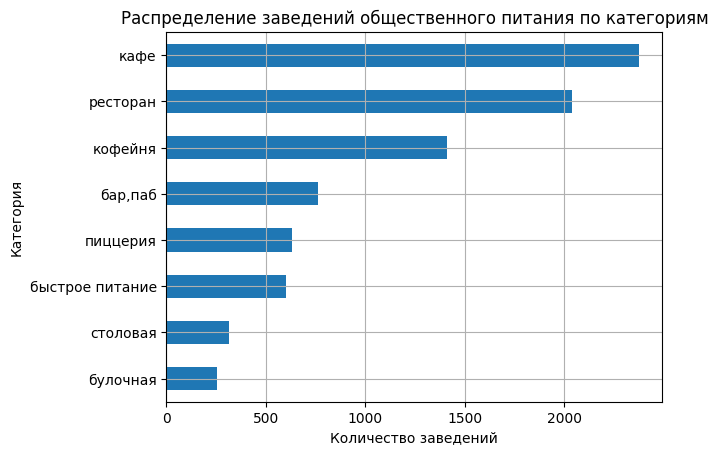

In [50]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Присвоим выше созданную сводную таблицу переменной
pivot_categories = df.pivot_table(index='category', values='name', aggfunc='count').sort_values(by='name', ascending=False)

# Строим линейчатую диаграмму с помощью pandas через plot(kind='barh')
pivot_categories.sort_values(by='name').plot(kind='barh', rot=0, legend=False, title=f'Распределение заведений общественного питания по категориям')

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Итак, уникальных категорий заведений общественного питания в наших данных 8. В Москве на исследуемый нами период времени больше всего (2378 из 8406) относились к категории "кафе". Эта категория довольно обширная по смыслу и очень много разных форматов заведений могут себя к ней отнести, не сильно задумываясь о какой-то особой концепции своего заведения. Затем шли "рестораны" и так далее - распределение и соотношение к друг другу хорошо видно на графике. Меньше всего заведений относилось к категории "булочная" - возможно, это связано с уже довольно устаревшим форматом - само слово "булочная" ассоциируется с прошлым, и вероятно этот формат постепенно уходит из жизни городов.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

Сгруппируем данные на основании столбца `district` и рассчитаем для каждого округа количество заведений общественного питания:

In [51]:
# Создаём группировку с цветовым градиентом
df.groupby('district')[['name']].count().sort_values(by='name', ascending=False).style.background_gradient()

,name
district,
Центральный административный округ,2242
Северный административный округ,898
Южный административный округ,892
Северо-Восточный административный округ,890
Западный административный округ,850
Восточный административный округ,798
Юго-Восточный административный округ,714
Юго-Западный административный округ,709
Северо-Западный административный округ,409


В предоставленных нам данных приведены 9 административных округов города Москва. Больше всего (2242) заведений общественного питания сконцентрировано в ЦАО. Северо-Западный административный округ (СЗАО) Москвы отличается наменьшей плотностью заведений общественного питания по сравнению с другими округами (409). Чтобы сравнение округов было более наглядным, построим сравнительный график. Для него тоже удобной формой будет линейчатая диаграмма - так длинные названия районов будут читабельнее:

<Figure size 700x300 with 0 Axes>

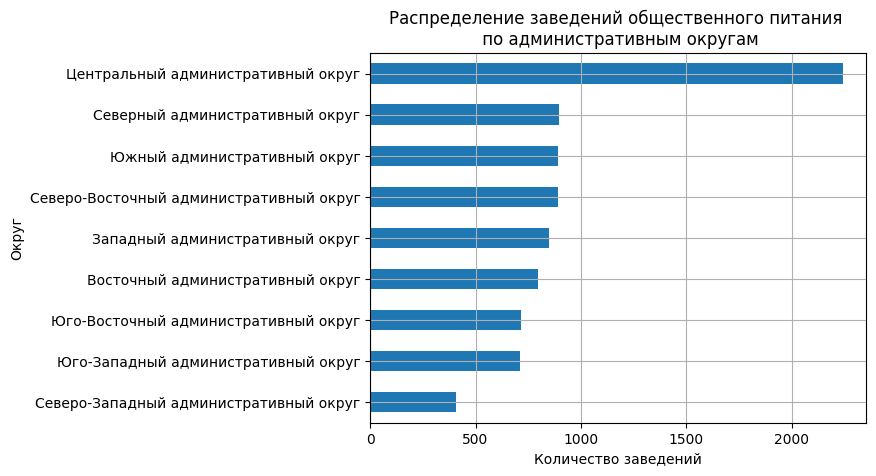

In [52]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

df_grouped_dist = df.groupby('district')[['name']].count().sort_values(by='name', ascending=False)

# Строим линейчатую диаграмму с помощью pandas через plot(kind='barh')
df_grouped_dist.sort_values(by='name').plot(kind='barh', rot=0, legend=False, title=f'Распределение заведений общественного питания \n по административным округам')

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Округ')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На графике хорошо видно распределение количества заведений в зависимости от административного округа. В СЗАО из в 5 раз меньше, чем в ЦАО.

Теперь отдельно рассмотрим Центральный округ Москвы. Рассмотрим распределение заведений в каждой категории в этом районе:

In [53]:
# Отфильтровываем датафрейм - отбираем данные только по ЦАО
df_CAO = df.copy()
df_CAO_filtered = df_CAO[df_CAO['district'] == 'Центральный административный округ']

# Создаём сводную таблицу с цветовым градиентом
df_CAO_filtered.pivot_table(index='category', values='name', aggfunc='count').sort_values(by='name', ascending=False).style.background_gradient()

,name
category,
ресторан,670
кафе,464
кофейня,428
"бар,паб",364
пиццерия,113
быстрое питание,87
столовая,66
булочная,50


Распределение внутри Центрального административного округа немного отличается от картины по всей Москве - тут рестораны "обошли" кафе. ЦАО — исторический и деловой центр города, привлекающий туристов, деловых людей и жителей с высоким доходом. Эти группы чаще выбирают рестораны, а не кафе. В остальных строках распределение аналогично тому, что у нас получилось по Москве в целом. Дополним таблицу распределения по категориям её визуализацией:

<Figure size 700x300 with 0 Axes>

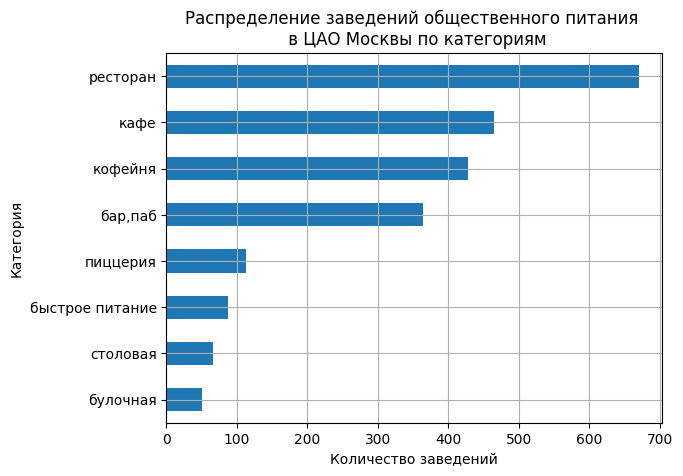

In [54]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

df_CAO_pivot = df_CAO_filtered.pivot_table(index='category', values='name', aggfunc='count').sort_values(by='name', ascending=False)

# Строим линейчатую диаграмму с помощью pandas через plot(kind='barh')
df_CAO_pivot.sort_values(by='name').plot(kind='barh', rot=0, legend=False, title=f'Распределение заведений общественного питания \n в ЦАО Москвы по категориям')

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В Центральном округе Москвы преобладают рестораны, их на 206 заведений больше, чем кафе. В общем в ЦАО в первой половине ретинга по числу заведений - более престижные виды общепита: рестораны, кафе, кофейни, бары. А заведений попроще, с более низкими ценами (пиццерий, точек быстрого питания, столовых и булочных) меньше - эти категории внизу рейтинга.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

Рассчитаем, сколько заведений в Москве относится к сетевым (признак chain = 1), а сколько к несетевым (признак chain = 0):

In [55]:
# Создаём сводную таблицу с цветовым градиентом
df.pivot_table(index='chain', values='name', aggfunc='count').sort_values(by='name', ascending=False).style.background_gradient()

,name
chain,
0,5199
1,3203


Более показательным в нашем случае будет рассчитать соотношение долей сетевых и несетевых заведений относительно их общего количества:

In [56]:
# Выведем соотношение сетевых и несетевых заведений
df['chain'].value_counts(normalize=True)

0    0.618781
1    0.381219
Name: chain, dtype: float64

Несетевых (chain=0) заведений 62%, сетевых (chain=1) - 38%. Проиллюстрируем это соотношение графиком:

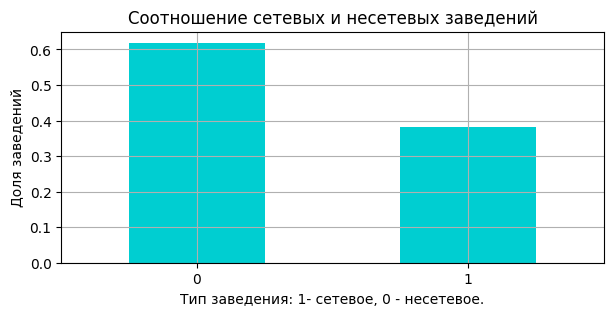

In [57]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['chain'].value_counts(normalize=True).plot(kind='bar', # Тип графика - столбчатая диаграмма
                                              rot=0, # Градус вращения подписи по оси Х
                                              legend=False, # Выключаем легенду
                                              title=f'Соотношение сетевых и несетевых заведений',
                                              color='#00ced1'
)

# Настраиваем оформление графика
plt.xlabel('Тип заведения: 1- сетевое, 0 - несетевое.')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Несетевых на 2000 заведений в Москве больше, на графике это ещё более четко видно. 

Теперь посмотрим на соотношение "сетевые-несетевые" внутри категорий заведений:

In [58]:
# Создаём сводную таблицу с цветовым градиентом для иллюстрации, сколько заведений в каждой категории
# являются сетевыми (1) или несетевыми (0)
df.pivot_table(index='chain', columns='category', values='name', aggfunc='count').style.background_gradient()

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
chain,,,,,,,,
0,596,99,371,1597,693,303,1313,227
1,168,157,232,779,720,330,729,88


Итак, соотношение в каждой категории разное. Лучше рассмотреть его на столбчатой диаграмме, чем таблицей:

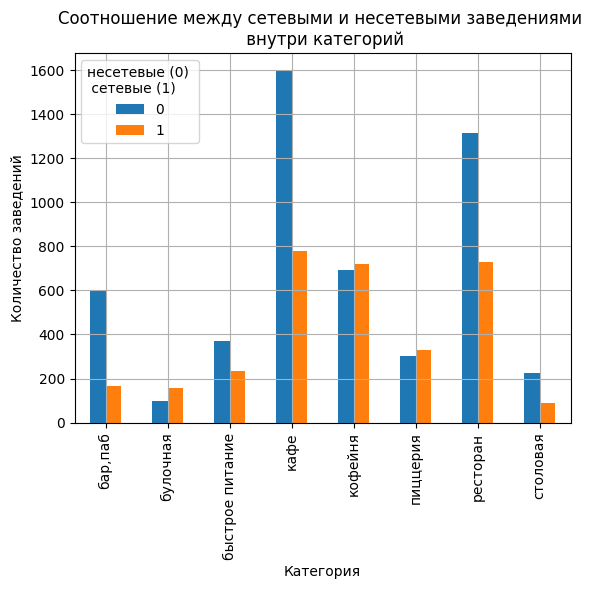

In [59]:
# Присваиваем группировку переменной
df_pivot_chain_cat = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)

# Строим столбчатую диаграмму
df_pivot_chain_cat.plot(kind='bar')

# Настраиваем график
plt.title('Соотношение между сетевыми и несетевыми заведениями \n внутри категорий') # Заголовок диаграммы
plt.ylabel('Количество заведений') # Подписываем ось Y
plt.xlabel('Категория') # Подписываем ось X
plt.xticks(rotation=90)  # Оставляем метки оси X горизонтальными
plt.legend(title='несетевые (0) \n сетевые (1)')  # Легенда для разбивки по `Products`

# Добавляем сетку графика
plt.grid()
# Отображаем график
plt.show()

Мы видим из графика, что в категориях бар/паб, быстрое питание, кафе, ресторан и столовая - несетевых заведений больше (в случае кафе их больше в 2 раза, в случае ресторанов - тоже почти в 2 раза). В остальных трёх категориях (булочная, кофейня, пиццерия) в Москве больше сетевых заведений.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.

Выведем основные статистики столбца  `seats`, чтобы составить план действий по его исследованию:

In [60]:
# Выводим основными статистики данных в столбце seats
df['seats'].describe()

count    8402.000000
mean       61.373244
std       107.409437
min        -1.000000
25%        -1.000000
50%        20.000000
75%        85.000000
max      1288.000000
Name: seats, dtype: float64

Ранее при обработке пропусков в этом столбце мы заменили пропуски на значение-заглушку "-1". Теперь для того, чтобы они не искажали нам расчёты, нужно строки с ними отфильтровать:

In [61]:
# Отфильтруем строки, в которых нет значений-заглушек
df_filtered_seats = df.copy()
df_filtered_seats = df[df['seats'] >= 0]

# Выведем основные статистики отфильтрованного столбца
df_filtered_seats['seats'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
95%       307.000000
99%       625.000000
max      1288.000000
Name: seats, dtype: float64

В статистиках отфильтрованного столбца мы видим максимальное значение, похожее на ошибку. Сложно представить себе заведение, где более тысячи посадочных мест. Также мы видим, что среднее несколько смещено вправо относительно медианы - это нам указывает, что нужно обратить внимание на значения в стороне максимума - там присутствуют экстремальные значения относительно типичного значения для этого столбца. И по значениям 95-го и 99-го персентилей мы видим, что такое высокое значение в столбце не одно. Лучше оценить распределение значений в столбце позволят гистограмма и диаграмма размаха:

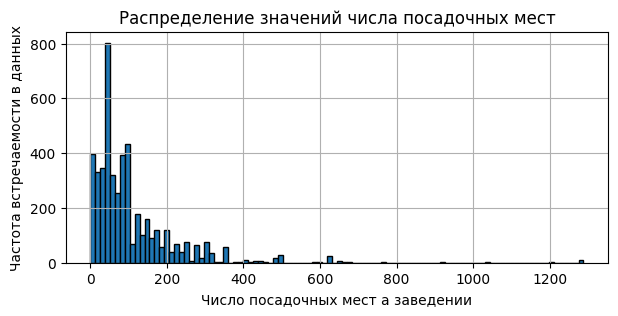

In [62]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_filtered_seats['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 100
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений числа посадочных мест')
plt.xlabel('Число посадочных мест а заведении')
plt.ylabel('Частота встречаемости в данных')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Распределение значений у нас несимметричное - с длинным правым хвостом. Встречается много значений равных 0. Из этого можно сделать вывод, что среднее не будет полноценно характеризовать это множество - лучше выбрать для этого медиану, она менее чувствительна к выбросам, которые в нашем случае имеют место. Посмотрим также на диаграмму размаха:

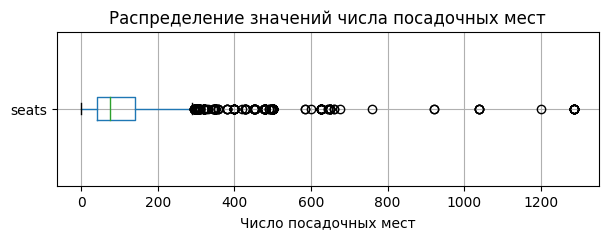

In [63]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим горизонтальную диаграмму размаха значений в столбце seats
df_filtered_seats.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений числа посадочных мест')
plt.xlabel('Число посадочных мест')

# Выводим график
plt.show()

In [64]:
# Вычислим медианы посадочных мест внутри категорий заведений 
# по датафрейму с отфильтрованными значениями -1
df_filtered_seats.groupby('category')['seats'].median().sort_values(ascending=False)

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64

Проиллюстрируем графиком соотношение между категориями заведений наиболее типичного количества посадочных мест:

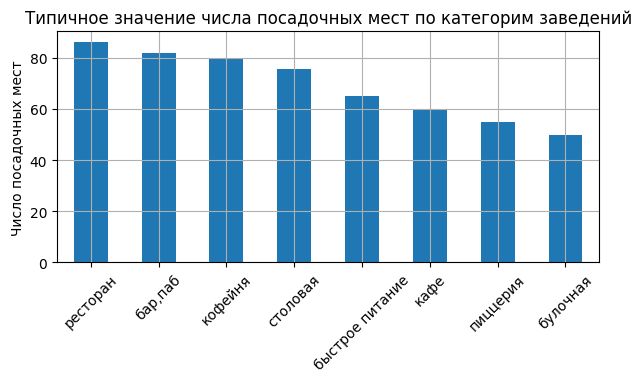

In [65]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# medians.plot(
df_filtered_seats.groupby('category')['seats'].median().sort_values(ascending=False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               x='category',
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Типичное значение числа посадочных мест по категорим заведений'
)

# Настраиваем оформление графика
plt.xlabel('')
plt.ylabel('Число посадочных мест')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Типичное занчение посадочных мест выше всего в категории "ресторан" (86), далее идут бары/пабы (81), затем кофейни (80). Наименьшее значение относится к категории "булочная" (50).

Типичное значение посадочных мест выше всего в категории "ресторан" (86), далее идут бары/пабы (82), затем кофейни (80). Наименьшее значение относится к категории "булочная" (50).

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

Вначале работы с этим столбцом посмотрим на его описательные статистики и гистограмму:

In [66]:
# Выводим основные статистики
df['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

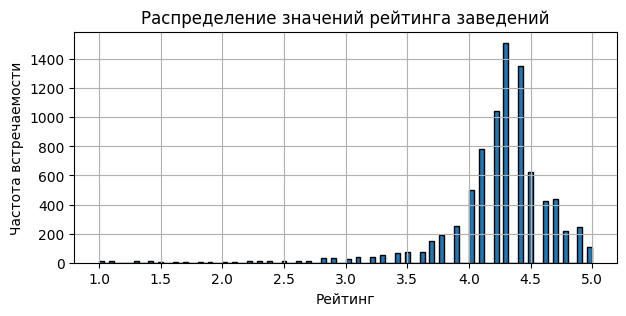

In [67]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['rating'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 100
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг')
plt.ylabel('Частота встречаемости')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Все значения в этом столбце реалистичные, без аномалий - точки не выходят за пределы диапазона от 1 до 5. Среднее (4,2) и медиана (4,3) близки друг к другу, но среднее (более чувствительное к "хвостам") чуть сдвинуто влево от медианы. С данными этого множества можно дальше работать без дополнительной фильтрации.

Рассчитаем и визуализируем распределение средних рейтингов по категориям заведений:

In [68]:
# Сгруппируем данные по категориям заведений и рассчитаем значение среднего рейтинга
df_grouped_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
df_grouped_rating

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

Визуализируем распределение средних рейтингов по категориям заведений:

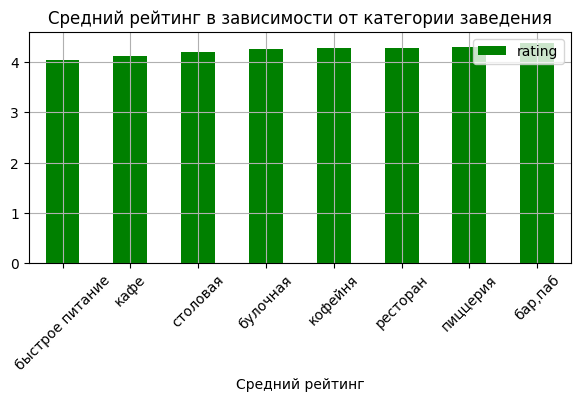

In [69]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диарамму
df_grouped_rating.sort_values(ascending=True).plot(kind='bar', # Тип графика - столбчатая диаграмма
                                                   x='category', # Значения по оси Х
                                                   rot=45, # Градус вращения подписи по оси Х
                                                   legend=True, # Включаем легенду
                                                   title=f'Средний рейтинг в зависимости от категории заведения',
                                                   color='#008000' # Цвет столбцов
)

# Настраиваем оформление графика
plt.xlabel('Средний рейтинг')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По среднему рейтингу в топе бары/пабы с оценкой 4,39. Самый низкий средний рейтинг у точек быстрого питания - 4,05. При этом мы видим, что диапазон средних значений оценок не сильно разнится - все значения среднего в пределах небольшого отрезка от 4,05 до 4,39 - то есть нет отличительно высоких или отличительно низких средних рейтингов между категориями. Это мы уже видели на гистограмме распределения всех оценок заведений - в компактности основной части графика относительно оси Х.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [70]:
import numpy as np

# Создадим копию датасета
df_corr = df.copy()

# Выведем количество пропусков в столбце seats до замены
print(f"Количество пропусков в столбце seats до замены: {df_corr['seats'].isna().sum()}")

# В копии датасета заменим значения -1 обратно на пропуски
df_corr.replace({-1: np.nan}, inplace=True)

# Выведем количество пропусков в столбце seats после замены
print(f"Количество пропусков в столбце seats после замены: {df_corr['seats'].isna().sum()}")

Количество пропусков в столбце seats до замены: 0
Количество пропусков в столбце seats после замены: 3610


В исходном объединённом датафрейме пропусков в seats было 3611, но одну строку с заглушкой мы удалили при обработке неявных дубликатов строк.

Теперь построим матрицу корреляции по столбцам 'category','district', 'rating', 'chain', 'seats', 'price_cat', 'is_24_7':

In [71]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df_corr[['category','district', 'rating', 'chain', 'seats', 'price_cat', 'is_24_7']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False).style.background_gradient()

interval columns not set, guessing: ['rating', 'chain', 'seats']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price_cat,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


Визуализируем корреляционную матрицу тепловой картой:

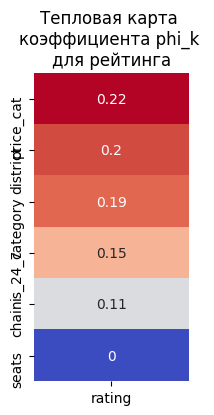

In [72]:
# Создаем фигуру с заданными размерами
plt.figure(figsize=(2, 4))

# Делаем срез корреляционной матрицы по столбцу rating
corr_matrix = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

#  Строим тепловую карту
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False)

# Поворачиваем метки по оси Y
plt.yticks(rotation=90)

# Добавляем заголовок графика
plt.title('Тепловая карта \nкоэффициента phi_k \nдля рейтинга')

# Выводим график
plt.show()

Получили визуализацию корреляционной матрицы. Можно использовать её для презентации итогов исследования.

Самая сильная возможная связь столбца с рейтингом выявлена с признаком "ценовая категория". Её сила невысока, направление положительное. Столбец price_cat у нас категориальный, в нём содержатся строки, обозначающие уровень цены. Мы не можем построить диаграмму рассеяния между количественными и категориальными данными. Между количественным и категориальным столцами взаимосвязь покажет столбчатая диаграмма:

Выведем средние значения рейтинга относительно ценовых категорий:

In [73]:
# Группируем датасет по ценовым категориям и рассчитываем средний рейтинг внутри них
df_corr.groupby('price_cat')['rating'].mean().sort_values()

price_cat
низкие           4.173077
средние          4.297874
выше среднего    4.386348
высокие          4.436611
Name: rating, dtype: float64

Теперь построим визуализацию взаимосвязи ценовой категории и среднего рейтинга:

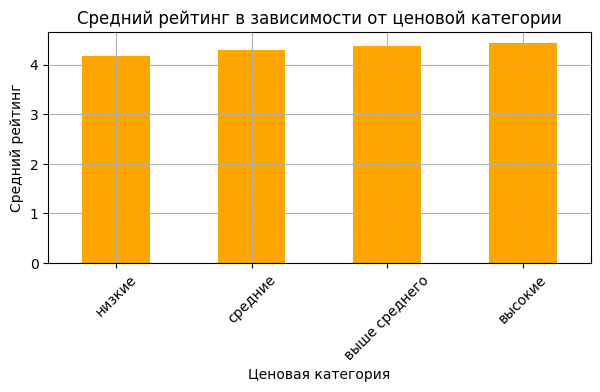

In [74]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
df_corr.groupby('price_cat')['rating'].mean().sort_values().plot(kind='bar', # Тип графика - столбчатая диаграмма
                                                   x='price_cat', # Значения по оси Х
                                                   rot=45, # Градус вращения подписи по оси Х
                                                   legend=False, # Выключаем легенду
                                                   title=f'Средний рейтинг в зависимости от ценовой категории',
                                                   color='#ffa500' # Цвет столбцов
)

# Настраиваем оформление графика
plt.xlabel('Ценовая категория')
plt.ylabel('Средний рейтинг')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Из графика мы можем сделать вывод, что, действительно, наблюдается небольшая по силе положительная связь между ценовой категорией заведения и рейтингом: чем выше ценовая категория, тем выше средний рейтинг.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

Отфильтруем только сетевые заведения и составим топ-15 по количеству заведений сети в регионе, для них посчитаем средний рейтинг и отметим категорию:

In [75]:
# Отфильтруем данные тлько для сетевых заведений
df_chain1 = df.copy()
df_chain1 = df_chain1[df_chain1['chain'] == 1]

# Сгруппируем данные по названиям и категориям и вычислим количество заведений и средний рейтинг по сетям
top15 = df_chain1.groupby(['name', 'category']).agg(cnt=('name', 'count'), avg=('rating', 'mean')).sort_values(by='cnt', ascending=False)

# Выведем только топ-15
top15.head(15)

,,cnt,avg
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


Лидер топ-15 - кофейни сети "Шоколадница" с 119 заведениями в Москве в изучаемый нами период времени. В топе по категориям больше всего встречается кофеен: их 6 сетей из 15-ти. По среднему рейтингу в этом топе выделяются кофейни "Кофемания" (4,46), которые по количеству заведений - наоборот, внизу списка 15-ти. Ниже всех рейтинг был у ресторанов Яндекс.Лавка - всего 3,87. Визуализируем рейтинг с помощью наиболее подходящей для него формы - линейчатого графика:

In [76]:
# Переведём индексы сгруппированной табллицы обратно с столбцы
top15 = top15.reset_index()

# Проверим корректность выполнения предыдущего действия
top15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1149 non-null   object 
 1   category  1149 non-null   object 
 2   cnt       1149 non-null   int64  
 3   avg       1149 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 36.0+ KB


<Figure size 700x300 with 0 Axes>

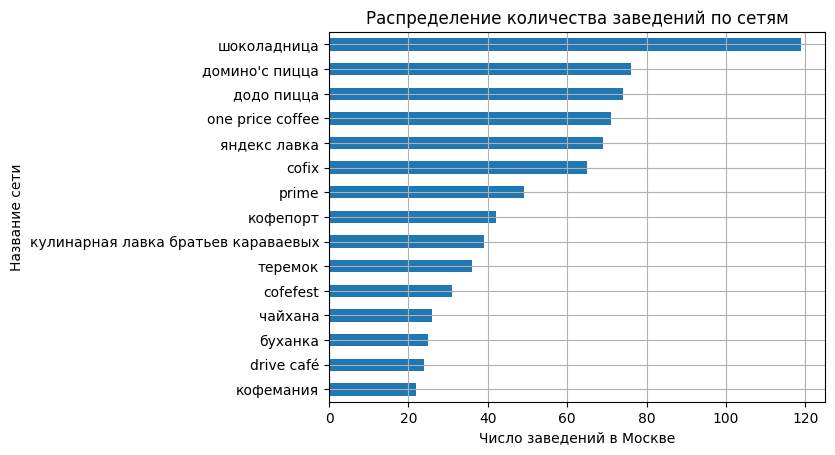

In [77]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Отфильтровываем для построения графика только топ-15
filtered_top15 = top15[top15['cnt'] >= 22]

# Строим диаграмму с помощью pandas через plot(kind='barh')
filtered_top15[['name', 'cnt']].sort_values(by='cnt', ascending=True).plot(kind='barh', x='name', rot=0, legend=False, title=f'Распределение количества заведений по сетям')

# Настраиваем оформление графика
plt.xlabel('Число заведений в Москве')
plt.ylabel('Название сети')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По этому графику можно составить визуальное впечатление о соотношении количества заведений, входящих в сети, составившие топ-15 по числу точек в Москве. Кофеен сети "Шоколадница" почти в 6 раз больше, чем кофеен "Кофемания".

Добавим визуализацию средних рейтингов топ-15 сетевых заведений:

<Figure size 700x300 with 0 Axes>

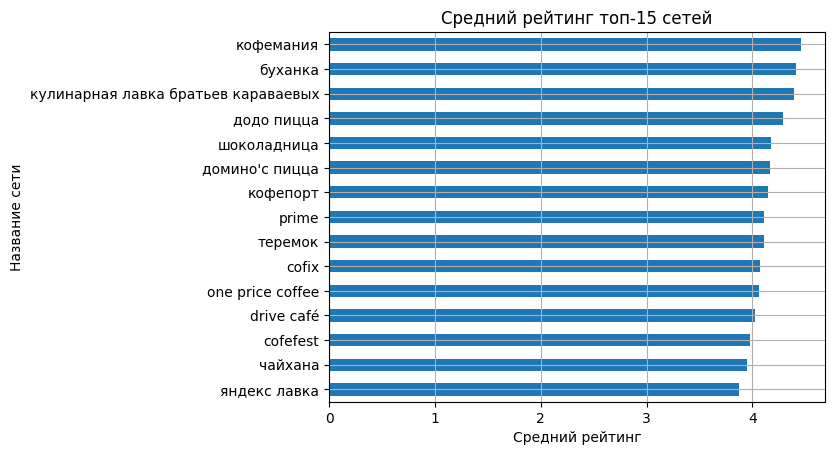

In [78]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим диаграмму с помощью pandas через plot(kind='barh')
filtered_top15[['name', 'avg']].sort_values(by='avg', ascending=True).plot(kind='barh', x='name', rot=0, legend=False, title=f'Средний рейтинг топ-15 сетей')

# Настраиваем оформление графика
plt.xlabel('Средний рейтинг')
plt.ylabel('Название сети')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Теперь наглядно представлено, как в топе-15 по числу заведений распределяется средний рейтинг: в лидерах "Кофемания", "Буханка" и "Кулинарная лавка братьев Караваевых", хуже всех рейтинг у Яндекс.Лавки.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.

Рассчитаем среднюю середину среднего чека для округов Москвы:

Проанализируем статистические показатели данных по среднему чеку заведений:

In [79]:
#  Выводим основные статистики столбца middle_of_bill_range
df['middle_of_bill_range'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
95%       2250.000000
99%       3750.000000
max      35000.000000
Name: middle_of_bill_range, dtype: float64

Значения имеются в диапазоне от 0 до 35000, среднее - 958, медиана ниже среднего - 750. Медиана менее чувствительна к выбросам в сравнении со средним, то есть из статистик мы можем предположить, что в данных столбца имеются выбросы в правой части - со стороны максимумов. Это же подтверждает разница почти в 10 раз между 99-м процентилем и максимальным значением диапазона. Для визуализации распределения значений построим гистограмму и диаграмму размаха:

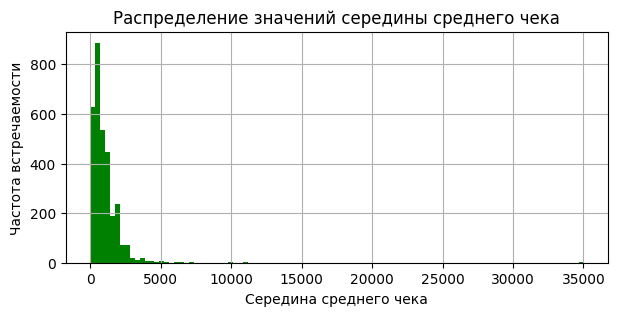

In [80]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['middle_of_bill_range'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 100
                rot=0, # Градус вращения подписи по оси Х
    color='#008000'
)

# Настраиваем оформление графика
plt.title('Распределение значений середины среднего чека')
plt.xlabel('Середина среднего чека')
plt.ylabel('Частота встречаемости')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

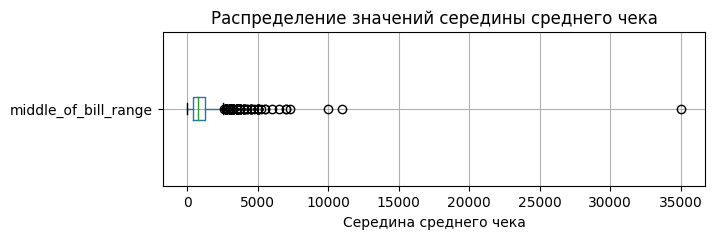

In [81]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим горизонтальную диаграмму размаха значений в столбце middle_of_bill_range
df.boxplot(column='middle_of_bill_range', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений середины среднего чека')
plt.xlabel('Середина среднего чека')
plt.ylabel('')

# Выводим график
plt.show()

Действительно, распределение значений несимметричное, "хвост" имеется только с правой стороны и выбросы в правой стороне графиков имеют место. Но нельзя сказать, что это однозначно ошибки, ведь средний чек вполне мог бы составить 10000 и 35000.

In [82]:
# Группируем данные по округам и рассчитываем для них среднюю середину среднего чека
df.groupby('district')['middle_of_bill_range'].mean().sort_values(ascending=False)

district
Центральный административный округ         1191.057547
Западный административный округ            1053.225490
Северный административный округ             927.959627
Южный административный округ                834.398089
Северо-Западный административный округ      822.222930
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_of_bill_range, dtype: float64

В Центральном административном округе середина среднего счёта выше, чем в остальных районах Москвы. Следом идёт Западный административный округ. Самое низкое значение этого показателя - в Юго-Восточном округе. Цена между ЮВАО и ЦАО разнится в 2 раза. 

На графике будет нагляднее сравнить показатели среднего чека между округами. Построим линейчатый - так длинные названия округов будет удобнее читать:

<Figure size 700x300 with 0 Axes>

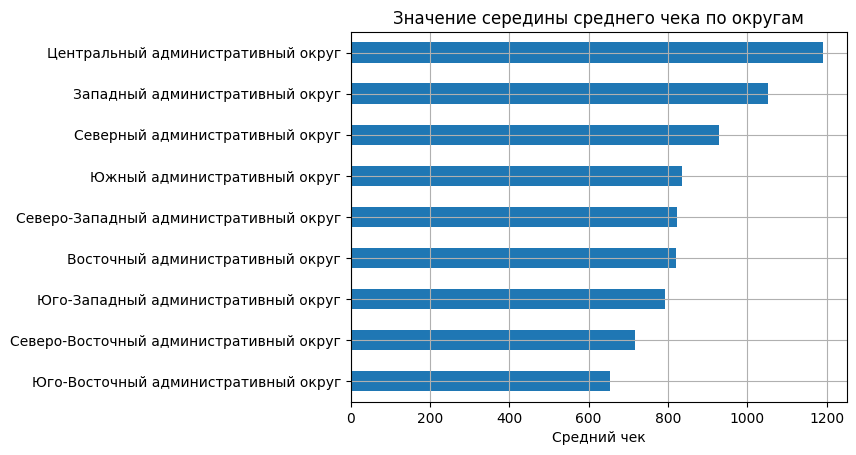

In [83]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

df_grouped_dist = df.groupby('district')['middle_of_bill_range'].mean().reset_index()

# Строим линейчатую диаграмму с помощью pandas через plot(kind='barh')
df_grouped_dist.sort_values(by='middle_of_bill_range', ascending=True).plot(kind='barh', x='district', rot=0, legend=False, title=f'Значение середины среднего чека по округам')

# Настраиваем оформление графика
plt.xlabel('Средний чек')
plt.ylabel('')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Средний счёт по заведениям ЦАО почти в два раза выше, чем в ЮВАО.

Чтобы сравнить распределение среднего чека и удалённость от центра, нам нужен список районов по степени их удалённости от центра. Обратимся к Яндекс.Браузеру за таким списком: "Москва разделена на 12 административных округов, которые можно условно расположить по степени удалённости от центра (Кремля и Красной площади) следующим образом:
- Центральный административный округ (ЦАО),
- Западный административный округ (ЗАО),
- Юго-Западный административный округ (ЮЗАО), 
- Северо-Западный административный округ (СЗАО),
- Северный административный округ (САО), 
- Северо-Восточный административный округ (СВАО), 
- Восточный административный округ (ВАО), 
- Юго-Восточный административный округ (ЮВАО),
- Южный административный округ (ЮАО)".
- Остальные три в наши данные не входят, поэтому их тут приводить не будем.

Теперь сопоставим эти два списка. ЦАО и ЗАО являются самыми центральными и в них самый высокий уровень середины среднего счёта в заведениях общепита. Следующим по удалённости от центра идёт ЮЗАО, но по ценнику в заведениях он 7-ой, то есть прямой однозначной зависимости цен в заведениях от удалённости от центра нет. Следующим по удалённости идёт СЗАО, а по ценам в заведениях этот округ в середине списка и в середине диапазона. Теперь посмотрим на уровень цен в заведениях самого удалённого от центра ЮАО: по ценам он 4-й сразу за самыми "дорогими" округами. Это ещё раз подтверждает, то прямой зависимости между средним счётом и удалённостью от центра нет. 

Чтобы ещё раз посмотреть на связь между ценами и удалённостью от центра, хорошо было бы построить диаграмму рассеяния. Но у нас нет столбца с количественным выражением удалённости от центра. Мы можем добавить такой столбец, используя список округов по степени удалённости. Их всего 9, присвоим верхнему в списке категорию 0, а нижнему - 8 и распределим остальным категории по степени удаления Чтобы ещё раз посмотреть на связь между ценами и удалённостью от центра, хорошо было бы построить диаграмму рассеяния. Но у нас нет столбца с количественным выражением удалённости от центра. Мы можем добавить такой столбец, используя список округов по степени удалённости. Их всего 9, присвоим верхнему в списке категорию 0, а нижнему - 8 и распределим остальным категории по степени удаления. Назовём его `distance`:

In [84]:
# Категоризуем округа по удалённости от центра Москвы - новый столбец distance заполним значениями от 0 до 8,
# где 0 - самый центральный район, а 8 - самый удалённый от центра
distance_cats = []
for distr in df['district']:
    if distr == 'Центральный административный округ':
        distance_cats.append(0)
    elif distr == 'Западный административный округ':
        distance_cats.append(1)
    elif distr == 'Юго-Западный административный округ':
        distance_cats.append(2)
    elif distr == 'Северо-Западный административный округ':
        distance_cats.append(3)
    elif distr == 'Северный административный округ':
        distance_cats.append(4)
    elif distr == 'Северо-Восточный административный округ':
        distance_cats.append(5)
    elif distr == 'Восточный административный округ':
        distance_cats.append(6)
    elif distr == 'Юго-Восточный административный округ':
        distance_cats.append(7)
    else:
        distance_cats.append(8)
        
df['distance'] = distance_cats

# Выведем для проверки несколько строк старого столбца district и нового distance
df[['district', 'distance']].head()

,district,distance
0,Северный административный округ,4
1,Северный административный округ,4
2,Северный административный округ,4
3,Северный административный округ,4
4,Северный административный округ,4


In [85]:
# Ещё одна проверка - убедимся, что строка с else в цикле сработала корректно
df[['district', 'distance']][df['district'] == 'Южный административный округ'].head()

,district,distance
4939,Южный административный округ,8
5121,Южный административный округ,8
5895,Южный административный округ,8
5910,Южный административный округ,8
5916,Южный административный округ,8


Новый столбец с признаком удалённости от центра Москвы создан и заполнен. Теперь мы можем построить диаграмму рассеяния между показателями middle_of_bill_range и distance:

In [86]:
# Строим диаграмму рассеяния значений середины среднего чека в зависимости от удалённости от центра Москвы distance
# diagramm_2 = df.plot(kind='scatter', x='distance', y='middle_of_bill_range', alpha=0.5, color='gold', edgecolor='black', title='Анализ взаимосвязи значений среднего чека \n и удалённости от центра')

Text(0, 0.5, 'Середина среднего чека')

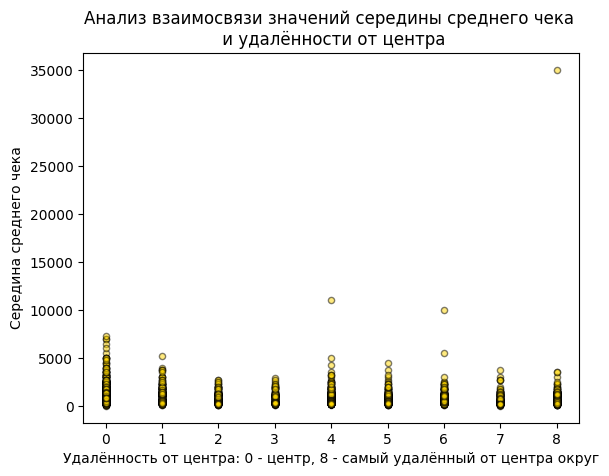

In [87]:
# Строим диаграмму рассеяния значений середины среднего чека в зависимости от удалённости от центра Москвы distance
diagramm_2 = df.plot(kind='scatter', x='distance', y='middle_of_bill_range', alpha=0.5, color='gold', edgecolor='black', title='Анализ взаимосвязи значений середины среднего чека \n и удалённости от центра')

# Подписываем оси
plt.xlabel('Удалённость от центра: 0 - центр, 8 - самый удалённый от центра округ')
plt.ylabel('Середина среднего чека')

На графике мы тоже видим, что какой-либо взаимосвязи между значениями середины чека и удалённостью от центра не наблюдается. В ЦАО значений очень много, их точно больше, чем в остальных районах. Значения среднего чека в ЦАО сосредоточены в диапазоне примерно до 8000 и больше всего точек уложилось в отрезок до 5000 включительно - выше плотность точек более прозрачная. Примечательно, что в удалённых от центра Северном АО (4 на оси Х) и Восточном АО (6 на оси Х) выпадали значения выше 10000 - выше максимального значения по ЦАО. А в самом далёком от центра Южном административном округе (8 на оси Х) был зарегистрирован средний чек в 35000. Хотя эти точки, выше максимума по ЦАО могут быть выбросами, связанными с ошибками. Это могло быть заделом для дополнительного исследования при наличии источника информации, по которому можно было бы сверить достоверность значений середины среднего чека. Сейчас такого источника нет. Из-за выбросов может быть искажено значение среднего от среднего чека и при корректировке данных взаимосвязь между средним чеком и удалённостью от центра нужно будет проверить снова.

In [88]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix_2 = df[['distance', 'middle_of_bill_range']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной')
correlation_matrix_2.loc[correlation_matrix_2.index != 'middle_of_bill_range'][['middle_of_bill_range']]

interval columns not set, guessing: ['distance', 'middle_of_bill_range']
Корреляционная матрица с коэффициентом phi_k для переменной


,middle_of_bill_range
distance,0.056558


Коэффициент корреляции близок к 0, что подтверждает ранее сделанный нами вывод о том, что взаимосвязи между удалённостью от центра и значением среднего по средним чекам нет. Охарактеризовать взаимосвязь можно только одним фактом - в ЦАО среднее значение выше, чем в остальных округах. В качестве дополнительной визуализации построим диаграмму сравнения значения середины среднего счёта по удалённости округа от центра:

<Figure size 700x300 with 0 Axes>

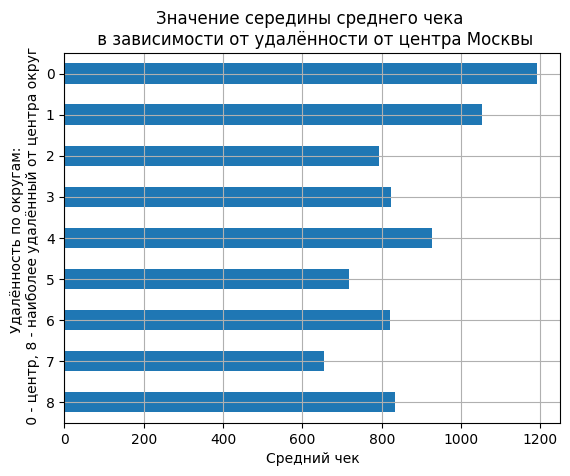

In [89]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

df_grouped_distance = df.groupby('distance')['middle_of_bill_range'].mean().reset_index()

# Строим диаграмму с помощью pandas через plot(kind='barh')
df_grouped_distance.sort_values(by='distance', ascending=False).plot(kind='barh', x='distance', rot=0, legend=False, title=f'Значение середины среднего чека \n в зависимости от удалённости от центра Москвы')

# Настраиваем оформление графика
plt.xlabel('Средний чек')
plt.ylabel('Удалённость по округам: \n 0 - центр, 8 - наиболее удалённый от центра округ')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Так нам ещё легче увидеть, что удаляясь от центра значение середины среднего счёта меняется неравномерно, без определённого характера этого изменения. Едиственно, что можно сказать - это значение снижается относительно первого (Центрального) округа, но снижается не относительно увеличению удалённости.

---

### Промежуточный вывод

Обобщим результаты, полученные в ходе исследовательского анализа данных по отдельным столбцам:

1. В наших данных представлено 8 категорий заведений общественного питания. В Москве на исследуемый нами период времени больше всего заведений относились к категории "кафе". Затем шли "рестораны" и так далее. Меньше всего заведений относилось к категории "булочная".
2. В предоставленных нам данных приведены 9 административных округов города Москва. Больше всего заведений общественного питания сконцентрировано в Центральном округе. Северо-Западный административный округ (СЗАО) Москвы отличается наменьшей плотностью заведений общественного питания по сравнению с другими округами. В Центральном округе Москвы преобладают рестораны. В общем, в ЦАО в первой половине списка по числу заведений - более престижные виды общепита: рестораны, кафе, кофейни, бары. А заведений попроще, с более низкими ценами (пиццерий, точек быстрого питания, столовых и булочных) меньше - эти категории внизу списка. То есть Центральный административный округ является премиальным сегментом рынка. Остальные округа — скорее, массовый сегмент. Соответственно, у заведений разная целевая аудитория в зависимости от округа. 
3. Несетевых заведений в Москве больше, чем сетевых. В категориях бар/паб, быстрое питание, кафе, ресторан и столовая - несетевых заведений больше. В остальных трёх категориях (булочная, кофейня, пиццерия) в Москве больше сетевых заведений.
4. В множестве значений, обозначающих число посадочных мест в заведениях были обнаружены следующие особенности: много значений равно 0 и присутствуют выбросы с правой стороны (в области максимума). Выбросы были рассмотрены нами подробно - обнаружены ошибки (не реальные значения) в области более 800 посадочных мест. После соответствующей фильтрации было вычислено типичное значение посадочных мест для каждой категории заведений. Выше всего оно в категории "ресторан", далее идут бары/пабы, затем кофейни. Наименьшее значение относится к категории "булочная".
5. Множество значений рейтинга заведений содержит значения внутри реалистичного диапазона от 1 до 5. По среднему рейтингу в топе бары/пабы с оценкой 4,39. Самый низкий средний рейтинг у точек быстрого питания - 4,05. В подмножестве средних значений рейтинга заведений по категориям нет отличительно высоких или отличительно низких средних рейтингов.
6. Наибольшая корреляция у показателя rating наблюдается со средним счётом. С остальными столбцами связь рейтинга слабая. А с количеством посадочных мест полностью отсутствует. При более подробном изучении взаимосвязи между показателями "рейтинг" и "средний счёт" связь между ними не подтвердилась.
7. По количеству заведений в сети лидер топ-15 - кофейни сети "Шоколадница". В топе по категориям больше всего встречается сетевых кофеен. По среднему рейтингу в этом топе выделяются кофейни "Кофемания", которые по количеству заведений - наоборот, внизу списка 15-ти. Ниже всех рейтинг был у ресторанов Яндекс.Лавка.
8. В Центральном административном округе середина среднего счёта выше, чем в остальных районах Москвы. Следом идёт Западный административный округ. Самое низкое значение этого показателя - в Юго-Восточном округе. Цена между ЮВАО и ЦАО разнится в 2 раза. Взаимосвязи между удалённостью от центра и значением среднего по средним чекам нет. Охарактеризовать взаимосвязь можно только одним фактом - в ЦАО среднее значение выше, чем в остальных округах.
9. В каждом подразделе исследовательского анализа созданы визуализации - таблицы и графики, которые можно использовать для презентации результатов исследования.

## Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

---

Перед данным исследованием стояла <b>цель - проанализировать рынок заведений общественного питания Москвы<b>. 

Для её достижения были проведены следующие <b>этапы работы<b>: 
- Изучены данные о заведениях общественного питания Москвы (на лето 2022 года) - их всего было 8406.
- Проведена предобработка данных и подготовка их к проведению исследования.
- Проведён исследовательский анализ данных, состоящий из восьми этапов и сопровождаемый визуализациями (таблицами и графиками).

<b>В качестве ключевых обнаруженных фактов в результате исследования можно обозначить<b>:
- Заведений, относящихся к категории "кафе" в Москве больше всего. Заведения категории "булочная" - самые немногочисленные.
- Подавляющее количество заведений общественного питания расположено в Центральном административном округе Москвы, что ожидаемо благодаря сочетанию многочисленных исторических, экономических и инфраструктурных факторов. В этом округе преобладают "престижные" форматы, такие как рестораны, кафе, кофейни, бары. В остальных округах Москвы заведений  в несколько раз меньше, самым небольшим количеством отличается Северо-Западный административный округ. В нецентральных округах по количеству точек преобладают пиццерий, точек быстрого питания, столовых и булочные - демократичные заведения с более доступными ценами. 
- Эти же тенденции подтверждает и исследование среднего чека: В ЦАО он самый высокий. В остальных - он ниже, но прямой зависимости среднего чека от удалённости от центра не было обнаружено. Видимо факторы ценообразования более сложны, чем просто географическое расположение и могут быть другие характеристики этих районов, влияющие на средний чек. Например, плотность населения, уровень жизни, тип застройки - но этих данных у нас в распоряжении не было. 
- В Москве по количеству точек преобладают несетевые заведения. Среди несетевых преобладают такие форматы как: бар/паб, быстрое питание, кафе, ресторан и столовая. Это свидетельствует о высокой конкуренции в этих категориях заведений и разнообразии уже имеющихся предложений. Видимо, предприниматели предпочитают начинать с единичных точек. К сетевым чаще всего относятся булочная, кофейня, пиццерия. Исходя из этого можно сделать вывод, что эти форматы легче масштабируются и имеют отработанную бизнес-модель. 
- После более подробного изучения сетевых заведений было обнаружено следующее: по количеству заведений в сети лидер топ-15 - кофейни сети "Шоколадница"; в топе по категориям больше всего встречается сетевых кофеен; по среднему рейтингу в этом топе выделяются кофейни "Кофемания", которые по количеству заведений - наоборот, внизу списка 15-ти; ниже всех рейтинг среди сетевых заведений был у ресторанов Яндекс.Лавка. Таким образом, не наблюдается прямой зависимости между количеством точек и качеством сервиса. 
- Было вычислено типичное значение посадочных мест для каждой категории заведений. Выше всего оно в категории "ресторан", далее идут бары/пабы и кофейни, далее - остальные форматы. Наименьшее значение относится к категории "булочная". Из этого можно сделать выводы, что вместимость связана с концепцией заведения - разные форматы предполагают различное целевое использование пространства. 
- По среднему рейтингу в Москве в топе бары/пабы с оценкой 4,39. Самый низкий средний рейтинг у точек быстрого питания - 4,05. Общая картина рейтингов достаточно однородна и стабильна - нет отличительно высоких или отличительно низких средних рейтингов внутри категорий. 
- Зависимости рейтинга и других, имеющихся у нас в распоряжении в данном случае, характеристик заведений обнаружено не было. 

<b>Рекомендации заказчику на основе сделанных выводов<b>:
- При выборе категории заведения можно учесть, что формат "кафе" самый популярный, что может говорить об востребованности такого "лёгкого" формата или о том, что создать заведение в этой категории легче всего. Заведения категории "булочная" - самые немногочисленные.  Возможно, этот формат устарел и уходит с рынка. С другой стороны, существует потенциал для развития этого сегмента, благодаря небольшой конкуренции в этой нише.
- В отношении округов расположения заведений можно рассмотреть возможность экспансии в менее насыщенные заведениями округа, адаптировать формат под специфику округа, учитывать платежеспособность населения в рассматриваемом районе. Для ЦАО: выбирать премиальные форматы, фокусироваться на уровне сервиса, создавать уникальные концепции. Для остальных округов: выбирать демократичные форматы, оптимизировать затраты, так как конкуренция в этих районах ниже. Но, возможно, ещё стоит пойти от обратного и изучить подробнее восстребованность заведений премиального сегмента в нецентральных районах Москвы.
- При формировании политики ценообразования рекомендации следующие: не ориентироваться только на удаленность от центра Москвы, подробно исследовать и учитывать локальные особенности рынка в конкретном округе, проанализировать платежеспособность целевой аудитории, учитывать конкурентную среду.
- Новым игрокам рынка можно порекомендовать либо начинать с несетевого формата и выбирать уникальные концепции, либо рассмотреть форматы, которые легче масштабировать (кофейни, пиццерии), но начать с отработки бизнес-процессов всё-таки на одной точке.
- При выборе сети, с которой открывать свои заведения, нужно учитывать, что в случае крупной сети нужно поддерживать качество на всех точках, при масштабировании небольших сетей с хорошиим рейтингом нужно сохранить уровень сервиса. При открытии именно сетевой кофейни - сеть "Кофемания" может послужить примером для изучения стандартов сервиса. В случае сотрудничества с сетью "Яндекс.Лавка" стоит отдельное внимание уделить аудиту качества, уровня сервиса и обратной связи от клиентов.
- Рекомендации для новых проектов в отношении вместимости: при открытии ресторана планировать достаточную площадь для размещения гостей; для баров/пабов и кофеен учитывать необходимость комфортного пространства; столовым, точкам быстрого питания, кафе и пиццериям оптимизировать площадь под средний поток посетителей; булочным минимизировать затраты на аренду больших помещений.
- При открытии точек быстрого питания: сформулировать и ввести политику, направленную на повышение качества обслуживания. Для остальных категорий: изучить конкурентов в отношении их стандартов сервиса, отслеживать и поддерживать у себя высокий уровень.
- Для любого нового бизнеса в области общественного питания в Москве можно рекомендовать - наладить сбор и анализ обратной связи с клиентами, чтобы выявить, какие факторы действительно напрямую влияют на рейтинг. И исходя из этого анализа уже сформировать политику управления качеством.